1. STRING Pre Processing



```
Original dataset downloaded from 
https://stringdb-static.org/download/protein.links.v11.5/9606.protein.links.v11.5.txt.gz 
using the homo sapiens filter.

Pre-processed data with HUGO symbols and relevant nodes downloaded from the NDEx compendium web server 
http://www.ndexbio.org/#/networkset/e8ebbdde-86dc-11e7-a10d-0ac135e8bacf?accesskey=7fbd23635b798321954e66c63526c46397a3f45b40298cf43f22d07d4feed0fa

https://github.com/schulter/EMOGI/blob/master/network_preprocessing/preprocessing_STRINGdb.ipynb
https://github.com/idekerlab/Network_Evaluation_Tools/blob/master/Network%20Processing%20Notebooks/STRING%20Processing.ipynb

Combined score in STRING PPI:
http://version10.string-db.org/help/faq/
```





In [1]:
import pandas as pd
!pip install mygene
import mygene
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def get_gene_symbols_from_proteins(list_of_ensembl_ids):
    # get Ensembl IDs for gene names
    mg = mygene.MyGeneInfo()
    res = mg.querymany(list_of_ensembl_ids,
                       scopes='ensembl.protein',
                       fields='symbol',
                     species='human', returnall=True
                      )
    def get_symbol_and_ensembl(d):
      if 'symbol' in d:
        return [d['query'], d['symbol']]
      else:
        return [d['query'], None]

    node_names = [get_symbol_and_ensembl(d) for d in res['out']]
    # now, retrieve the names and IDs from a dictionary and put in DF
    node_names = pd.DataFrame(node_names, columns=['Ensembl_ID', 'Symbol']).set_index('Ensembl_ID')
    node_names.dropna(axis=0, inplace=True)
    return node_names

Defaulting to user installation because normal site-packages is not writeable


/home/gee3/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/gee3/.local/lib/python3.8/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 20 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


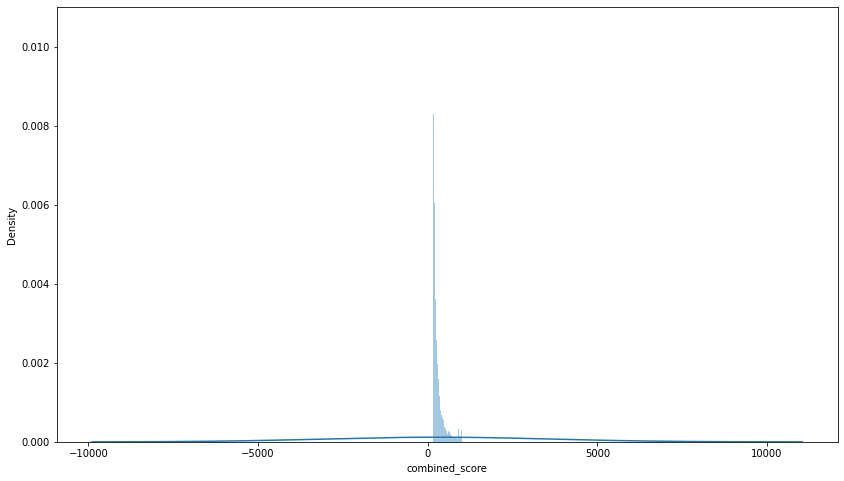

In [2]:
string_ppis = pd.read_csv('9606.protein.links.v11.5.txt', sep=' ')
fig = plt.figure(figsize=(14, 8))
sns.distplot(string_ppis.combined_score, kde_kws={'bw': 20})

In [3]:
high_conf_string_ppis = string_ppis[string_ppis.combined_score >= 850].copy() # same as 0.85 threshold (they multiplied by 1000 to have ints)
high_conf_string_ppis.loc[:, 'protein1'] = [i[1] for i in high_conf_string_ppis.protein1.str.split('.')]
high_conf_string_ppis.loc[:, 'protein2'] = [i[1] for i in high_conf_string_ppis.protein2.str.split('.')]
# high_conf_string_ppis.to_csv('../data/networks/string_ENSP_ids_highconf.tsv', sep='\t', compression='gzip')

In [4]:
ens_names = high_conf_string_ppis.protein1.append(high_conf_string_ppis.protein2).unique()
ens_to_symbol = get_gene_symbols_from_proteins(ens_names)

querying 1-1000...done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-4000...done.
querying 4001-5000...done.
querying 5001-6000...done.
querying 6001-7000...done.
querying 7001-8000...done.
querying 8001-9000...done.
querying 9001-10000...done.
querying 10001-11000...done.
querying 11001-12000...done.
querying 12001-12885...done.
Finished.
350 input query terms found no hit:
	['ENSP00000035383', 'ENSP00000062104', 'ENSP00000204615', 'ENSP00000205890', 'ENSP00000215739', 'ENS


In [5]:
p1_incl = high_conf_string_ppis.join(ens_to_symbol, on='protein1', how='inner', rsuffix='_p1')
both_incl = p1_incl.join(ens_to_symbol, on='protein2', how='inner', rsuffix='_p2')
string_edgelist_symbols = both_incl.drop(['protein1', 'protein2'], axis=1)
string_edgelist_symbols.columns = ['confidence', 'partner1', 'partner2']
string_ppi_final = string_edgelist_symbols[['partner1', 'partner2', 'confidence']]

In [6]:
G = nx.from_pandas_edgelist(string_ppi_final, source='partner1', target='partner2')
print ("Network with {} nodes and {} edges".format(G.number_of_nodes(), G.number_of_edges()))

Network with 12412 nodes and 139565 edges


In [13]:
string_ppi_final.to_csv('string_preprocessed.tsv', sep='\t', compression='gzip')

In [12]:
import networkx as nx

In [11]:
import scipy

In [16]:
import numpy as npb

In [30]:
am = nx.adjacency_matrix(G, nodelist=None, weight='weight')

In [31]:
dm = am.toarray()

In [32]:
filename='adjacency_matrix.txt'
np.savetxt(filename,dm)